In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

DATA_DIR = '../data/raw/'

In [15]:
# load files
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
users = pd.read_csv(os.path.join(DATA_DIR, 'users.csv'))
words = pd.read_csv(os.path.join(DATA_DIR, 'words.csv'), encoding='ISO-8859-1')

### Description about train/test files


This csv file contains data that relate to how people rate EMI artists, during the market research interviews, right after hearing a sample of an artist’s song. 

The 6 columns are:

* __Artist__: An anonymised identifier for the EMI artist.
* __Track__: An anonymised identifier for the artist’s track.
* __User__: An anonymised identifier for the market research respondent, who will have just heard a sample from the track.
* __Rating__: A number between X-100 which answers the question: How much do you like or dislike the music?  (Train only, you're predicting this for the test set)
* __Time__: The time the market research was completed: It is the anonymised research date indicating which month the research was conducted in. It can help you understand which other artists/tracks were researched in the same wave. Note it is not in chronological order

In [8]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [9]:
test.head()

,Artist,Track,User,Time
0,1,6,3475,18
1,6,149,39210,15
2,40,177,47861,17
3,31,79,27413,11
4,26,66,23232,22


users.csv files gives data about the respondents themselves, including their attitude towards music. The columns include:

* __User__: The anonymised user identifier
* __Gender__: Male/female
* __Age__: The respondent’s age, in years.
* __Working status__: Whether they are working full-time/retired/etc.
* __Region__: The region of the United Kingdom where they live.
* __MUSIC__: The respondent’s view on the importance of music in his/her life.
* __LIST_OWN__: An estimate for the number of daily hours spent listening to music they own or have chosen.
* __LIST_BACK__: An estimate for the number of daily hours the respondent spends listening to background music/music they have not chosen.
* __Music habit questions__: Each of these asks the respondent to rate, on a scale of X-100, whether they agree with the following:
<ol>
<li>I enjoy actively searching for and discovering music that I have never heard before</li>
<li>I find it easy to find new music</li>
<li>I am constantly interested in and looking for more music</li>
<li>I would like to buy new music but I don’t know what to buy</li>
<li>I used to know where to find music</li>
<li>I am not willing to pay for music</li>
<li>I enjoy music primarily from going out to dance</li>
<li>Music for me is all about nightlife and going out</li>
<li>I am out of touch with new music</li>
<li>My music collection is a source of pride</li>
<li>Pop music is fun</li>
<li>Pop music helps me to escape</li>
<li>I want a multi media experience at my fingertips wherever I go</li>
<li>I love technology</li>
<li>People often ask my advice on music - what to listen to</li>
<li>I would be willing to pay for the opportunity to buy new music pre-release</li>
<li>I find seeing a new artist / band on TV a useful way of discovering new music</li>
<li>I like to be at the cutting edge of new music</li>
<li>I like to know about music before other people</li>
</ol>

In [16]:
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0


words.csv file contains data that shows how people describe the EMI artists whose music they have just heard.

* __Artist__: An anonymised identifier for the EMI artist.
* __User__: An anonymised identifier for the market research respondent, who will have just heard one or more samples from the artist.
* __HEARD_OF__: An entry which answers the question: Have you heard of and/or heard music by this artist?
* __OWN_ARTIST_MUSIC__: which answers the question: Do you have this artist in your music collection?
* __LIKE_ARTIST__: A numerical entry which answers the question: To what extent do you like or dislike listening this artist?

<p>Finally, a list of words. There are 82 different words, ranging from “Soulful” to “Cheesy” and “Aggressive.” After listening to tracks from a particular artist, each respondent will have selected the words they think best describe the artist from a given set. The values in each column are therefore 1, if the respondent thinks that word describes the artist, 0 if the respondent does not think the word describes the artist, and empty if the word was not part of the current interview set.</p>

In [17]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN


### Distribution of Ratings

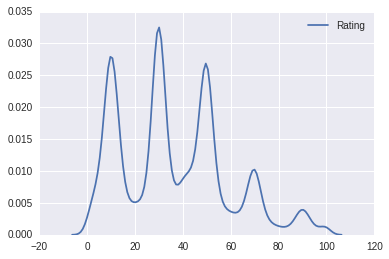

In [18]:
sns.kdeplot(train.Rating);

## Mean Ratings By Artist

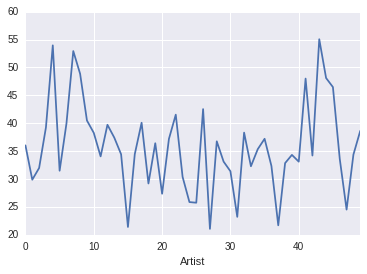

In [23]:
train.groupby('Artist')['Rating'].mean().plot();

## Mean Rating By Track

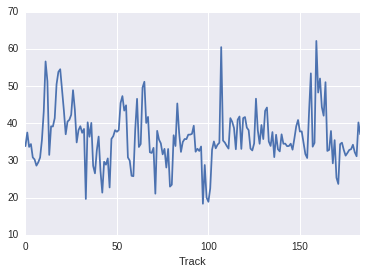

In [27]:
train.groupby('Track')['Rating'].mean().plot();

## Mean Ratings By Time

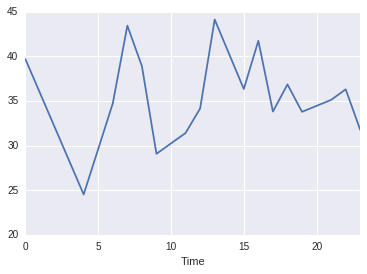

In [35]:
train.groupby('Time')['Rating'].mean().plot();